## PROJECT 3 - World Happiness Report

$\color{red}{\text{Any kind of plagiarism (help from your friends or getting help from internet) is prohibited. }}$
Submit $\color{red}{\text{only}}$ your jupyter notebook file  to elearn. Everyting must be submitted before the deadline. No extension requests or late submissions will be accepted. The elearn dropbox will close on the due time and date.


In this project, you will use the World Happiness Report datasets for years 2015-2019.  The World Happiness Reports are  datasets released by the United Nations anually that ranks countries based on happiness levels. These reports contain a Happiness Score that is then used to determine a country's rank relative to other country’s scores.

Dataset Information: Features

Score - Gallup asked respondents to evaluate their current life as a whole using the mental image of a ladder, with the best possible life for them as a 10 and worst possible as a 0.

GDP- based on GDP per capita is in terms of Purchasing Power Parity (PPP). The equation uses the natural log of GDP per capita.

Support - is the national average of the binary responses (either 0 or 1) to the Gallup World Poll (GWP) question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
Health - based on life expectancy at birth.

Freedom - to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

Generosity - is the residual of regressing the national average of GWP responses to the question “Have you donated money to a charity in the past month?” on GDP per capita

Corruption - “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?” Where data for government corruption are missing, the perception of business corruption is used as the overall corruption-perception measure.

## Question 1. Use the given datasets 2015-2019.csv files and create a dataframe to hold the averages of the given data. Some of the data for some countries are missing. Remove any missing country which has any missing data. (20 Points)
$\color{red}{\text{Answer:}}$ 


In [42]:
#Import modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import ipywidgets as widgets
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
from sklearn.decomposition import PCA
from sklearn import preprocessing
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [13]:
#Read CSV files
df1= pd.read_csv('2015.csv')
df2= pd.read_csv('2016.csv')
df3= pd.read_csv('2017.csv')
df4= pd.read_csv('2018.csv')
df5= pd.read_csv('2019.csv')

#Merge datasets into one dataframe
df = pd.concat([df1, df2, df3, df4, df5])

print(df.shape[0])
df.head()

782


,Rank,Country,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [29]:
#Remove rows with null values
df.dropna(inplace= True)

print(df.shape[0])
df.head()

781


,Rank,Country,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [27]:
avg_df = df.groupby('Country').mean()

In [28]:
print(avg_df)

              Rank    Score       GDP   Support   Healthy   Freedom  \
Country                                                               
Afghanistan  149.4  3.51280  0.357113  0.409753  0.254707  0.117924   
Albania      106.4  4.71260  0.938633  0.754931  0.787696  0.371898   
Algeria       66.2  5.66760  1.012963  1.074205  0.665057  0.178437   
Angola       140.0  3.87225  0.798380  0.938368  0.133902  0.027433   
Argentina     31.2  6.45940  1.111035  1.330960  0.760895  0.481620   
...            ...      ...       ...       ...       ...       ...   
Venezuela     71.8  5.53140  1.052468  1.323264  0.683741  0.213709   
Vietnam       90.8  5.15460  0.723416  1.138384  0.722700  0.577207   
Yemen        146.4  3.62580  0.489313  0.865448  0.365440  0.244175   
Zambia       114.0  4.58440  0.571761  0.932381  0.302761  0.462099   
Zimbabwe     134.8  4.00660  0.344051  1.007727  0.274403  0.323257   

             Corruption  Generosity  
Country                              


## Question 2. Check the correlation between the features and explain it. Which one correlates the most with the happiness score? (10 Points)
$\color{red}{\text{Answer:}}$ Rank and Score have a near perfect negative correlation. In this dataset, if the feature has a positive correlation with Score, it is guaranteed that it will have a negative correlation with Rank. This goes vice versa as well. Score has a positive correlation with GDP, Support, Healthy, Freedom, Corruption, and Generosity. Based on the correlation matrix, GDP correlates the most with the happiness score; they have a positive correlation and GDP is the closest to 1 in the correlation matrix. The higher the GDP, the higher the score.

In [38]:
avg_df.head()

,Rank,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
Country,,,,,,,,
Afghanistan,149.4,3.51280,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730
Albania,106.4,4.71260,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887
Algeria,66.2,5.66760,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219
Angola,140.0,3.87225,0.798380,0.938368,0.133902,0.027433,0.071570,0.105269
Argentina,31.2,6.45940,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371


In [39]:
corr_matrix = avg_df.corr()
corr_matrix

,Rank,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
Rank,1.000000,-0.994279,-0.809713,-0.749107,-0.777219,-0.577113,-0.348660,-0.121489
Score,-0.994279,1.000000,0.803543,0.757495,0.772705,0.590592,0.376951,0.142915
GDP,-0.809713,0.803543,1.000000,0.706079,0.839353,0.373902,0.249207,-0.045402
Support,-0.749107,0.757495,0.706079,1.000000,0.638537,0.425253,0.152348,0.027667
Healthy,-0.777219,0.772705,0.839353,0.638537,1.000000,0.370649,0.244456,0.047570
Freedom,-0.577113,0.590592,0.373902,0.425253,0.370649,1.000000,0.480136,0.329404
Corruption,-0.348660,0.376951,0.249207,0.152348,0.244456,0.480136,1.000000,0.366209
Generosity,-0.121489,0.142915,-0.045402,0.027667,0.047570,0.329404,0.366209,1.000000


<Axes: >

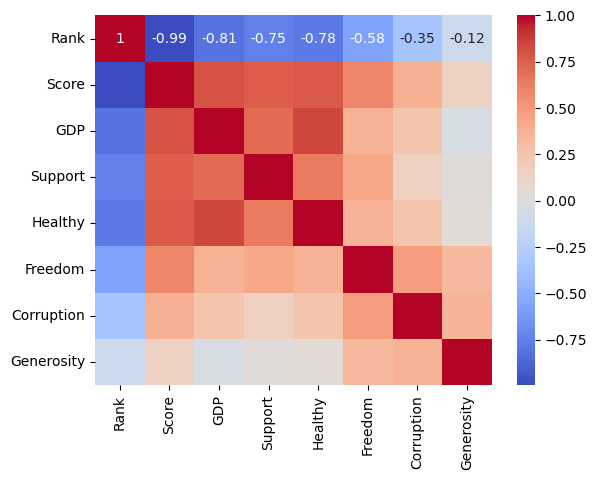

In [40]:
#Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

## Question 3. Apply PCA to reduce the dimension. Explain your results. As a good data visualizer expert, how many principal components should be used to transform this data without losing much information? How many dimensions that could be reduced?  (20 Points)
$\color{red}{\text{Answer:}}$ When applying PCA to reduce the dimension, I only see 6 dimensions in the printed result. I believe there should be 6 principal components used to transform this data without losing essential information. 2 dimensions can be reduced without losing data integrity. Checking the variance for each principal component confirms this as well.

In [48]:
PCA_data = preprocessing.scale(avg_df)
pca = PCA()
pca.fit(PCA_data)

print(PCA_data)

[[ 1.60557327 -1.70432183 -1.35772864 ... -2.06072169 -0.68717443
   0.39875536]
 [ 0.6295003  -0.60938342  0.06455459 ... -0.28658767 -0.83035205
  -0.46753838]
 [-0.28301443  0.26215033  0.24635223 ... -1.63800636  0.15890591
  -1.32362561]
 ...
 [ 1.53747516 -1.60119794 -1.03439486 ... -1.17879651 -0.6011113
  -1.08320208]
 [ 0.80201552 -0.72637886 -0.83274137 ...  0.34351117 -0.30989354
  -0.02899783]
 [ 1.27416245 -1.25367956 -1.3896761  ... -0.62636856 -0.38045627
  -0.45433178]]


In [50]:
print("Variance of each principal component:")
print(pca.explained_variance_)

print("The Variance ratios of each prinicipal component:")
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals =1)
print(per_var)

Variance of each principal component:
[4.67078502 1.48359988 0.62248287 0.53874933 0.3373919  0.24432677
 0.14503925 0.00496226]
The Variance ratios of each prinicipal component:
[58.  18.4  7.7  6.7  4.2  3.   1.8  0.1]


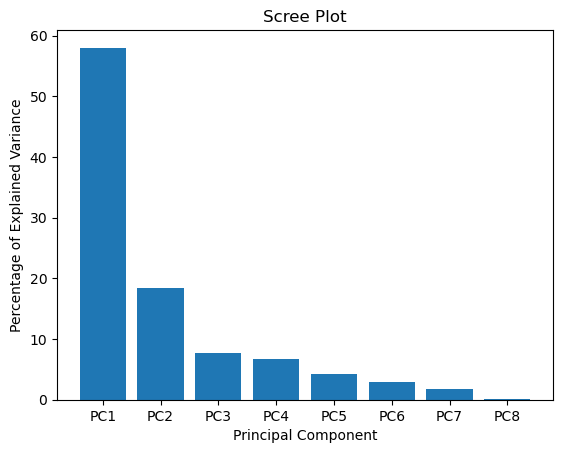

In [52]:
# Plot the variance ratios as a bar graph
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

## Question 4. Which feature/features have the highest effect on the variance or in other words, which feature is responsible from the differences between countries the most? Explain it. (30 Points)
$\color{red}{\text{Answer:}}$ The features that has the highest effect on the variance are score and rank which makes since they have a near perfect correlation, just negative. Score is slightly higher by a hair, however I will say both since it is so close. Score is 0.446405 and  0.444117.

In [89]:
#how the column which has the highest affect on the variance
loadings = pd.DataFrame(pca.components_.T, columns=['PC'+str(i) for i in range(1, len(avg_df.columns)+1)], index=avg_df.columns)
loadings['PC1'].abs().sort_values(ascending=False)

Score         0.446405
Rank          0.444117
GDP           0.405275
Healthy       0.394604
Support       0.376514
Freedom       0.303225
Corruption    0.206984
Generosity    0.083502
Name: PC1, dtype: float64

## Question 5. Show average happiness scores on a world map. (10 Points)
$\color{red}{\text{Answer:}}$ 

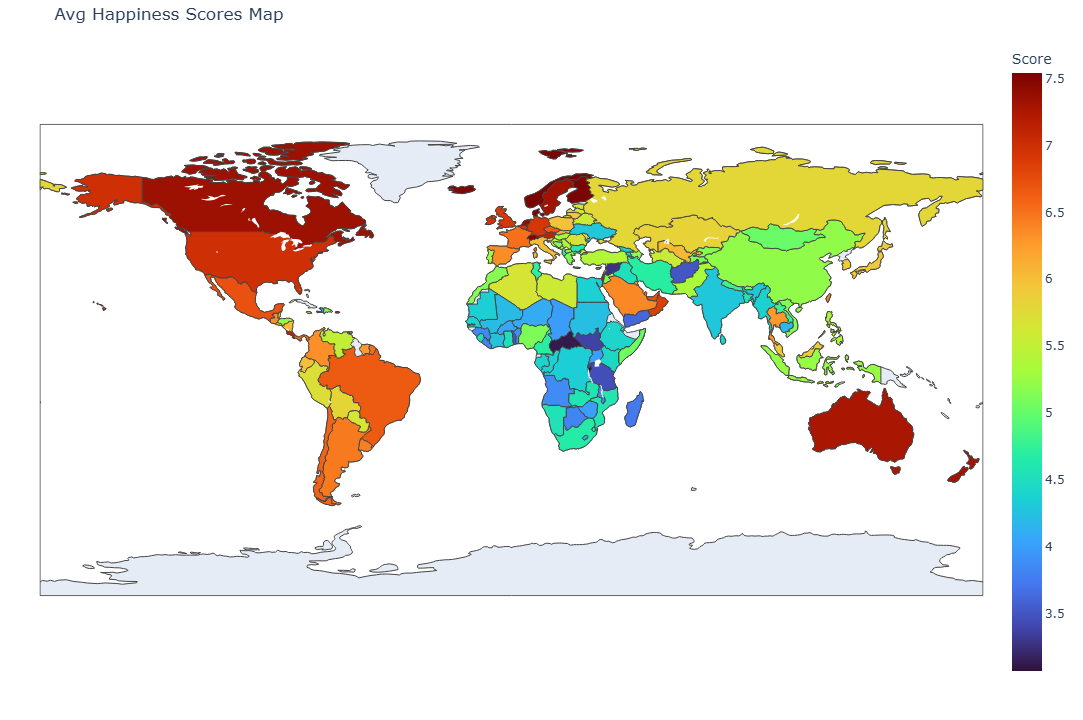

In [341]:
df_country = avg_df.groupby('Country')['Score'].mean().reset_index()

Country_Happiness = px.choropleth(df_country, locations='Country', locationmode='country names', 
                                  color='Score', color_continuous_scale='Turbo', title = 'Avg Happiness Scores Map')
Country_Happiness.update_layout(margin=dict(l=40, r=40, t=40, b=40))
Country_Happiness.show()

## Question 6. Use ipywidgets library and add an animation with a slidebar and a check box. You are free to choose any data or any approach. I need to see that you are able to use this library effectively. (10 Points)
$\color{red}{\text{Answer:}}$ 

In [357]:
%pip install -q ipywidgets matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import Audio, display
import numpy as np

In [8]:
def beat_freq(f1=225.0, f2=250.0):
    max_time = 3
    rate = 8000
    times = np.linspace(0,max_time,rate*max_time)
    signal = np.sin(2*np.pi*f1*times) + np.sin(2*np.pi*f2*times)
    display(Audio(data=signal, rate=rate))
    return signal



In [17]:
v = interactive(beat_freq, f1=(223.0,300.0), f2=(219.0,300.0))
display(v)

b = widgets.Button(description= "Play Sound")
b.keys
b.style.button_color = 'blue'
display(b)

interactive(children=(FloatSlider(value=225.0, description='f1', max=300.0, min=223.0), FloatSlider(value=250.…

Button(description='Play Sound', style=ButtonStyle(button_color='blue'))

## Graduate Student Question or Bonus for undergraduate students.  Find and show  which countries are the outliers for each feature. If you remove these outliers how your results will change for the first 4 questions. Also show average happiness scores of these outliers on the world map and compare with the map from Question 5. (50 Points for graduate students and 10 bonus points for undergraduate students.)
$\color{red}{\text{Answer:}}$ The Score and Rank still has the highest effect on the variance and it looks like it should be 7 dimensions for the PCA now.

<Axes: >

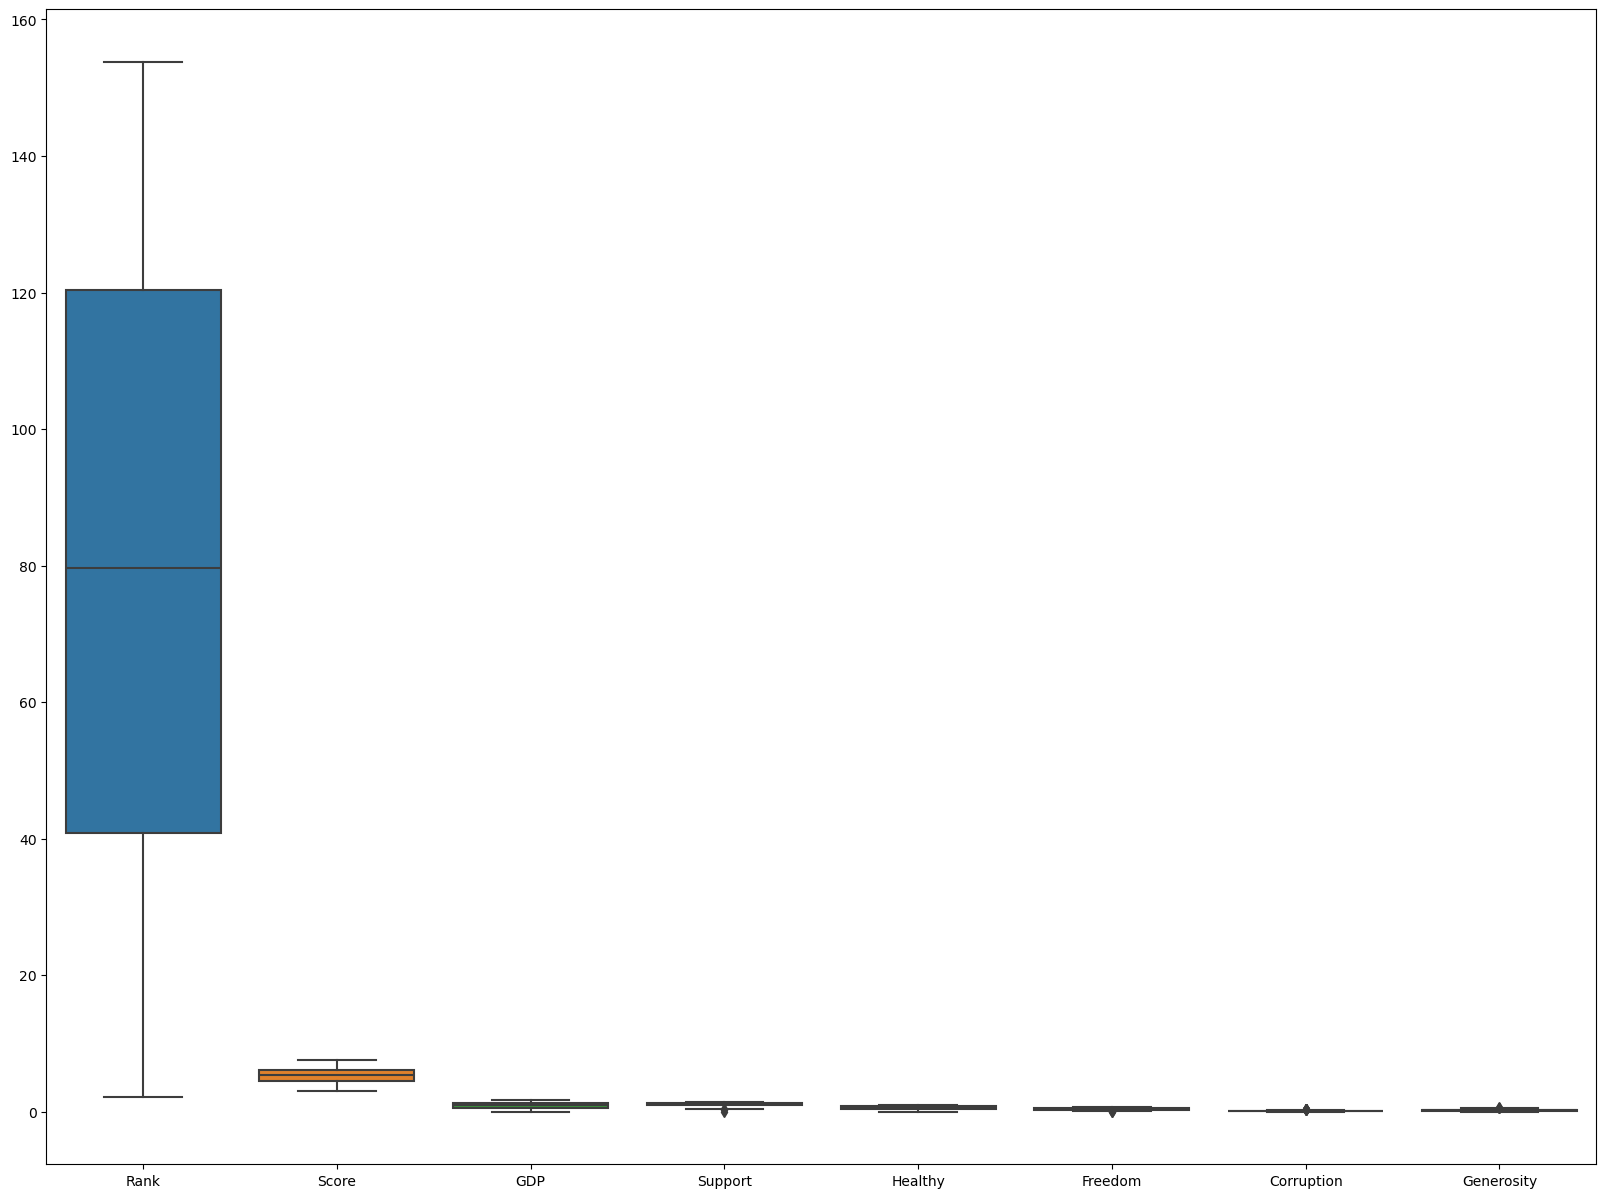

In [302]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=avg_df)

In [303]:
def box_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    mask = (series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)
    series = series[mask]
    return series

In [304]:
S_outlier = box_outliers(avg_df['Support'])
print(S_outlier)

Country
Benin                       0.340470
Central African Republic    0.000000
Syria                       0.355931
Togo                        0.323567
Name: Support, dtype: float64


In [305]:
#Remove outliers from Support
no_outliers = avg_df.drop(["Benin", "Central African Republic", "Syria", "Togo"])

<Axes: xlabel='Support'>

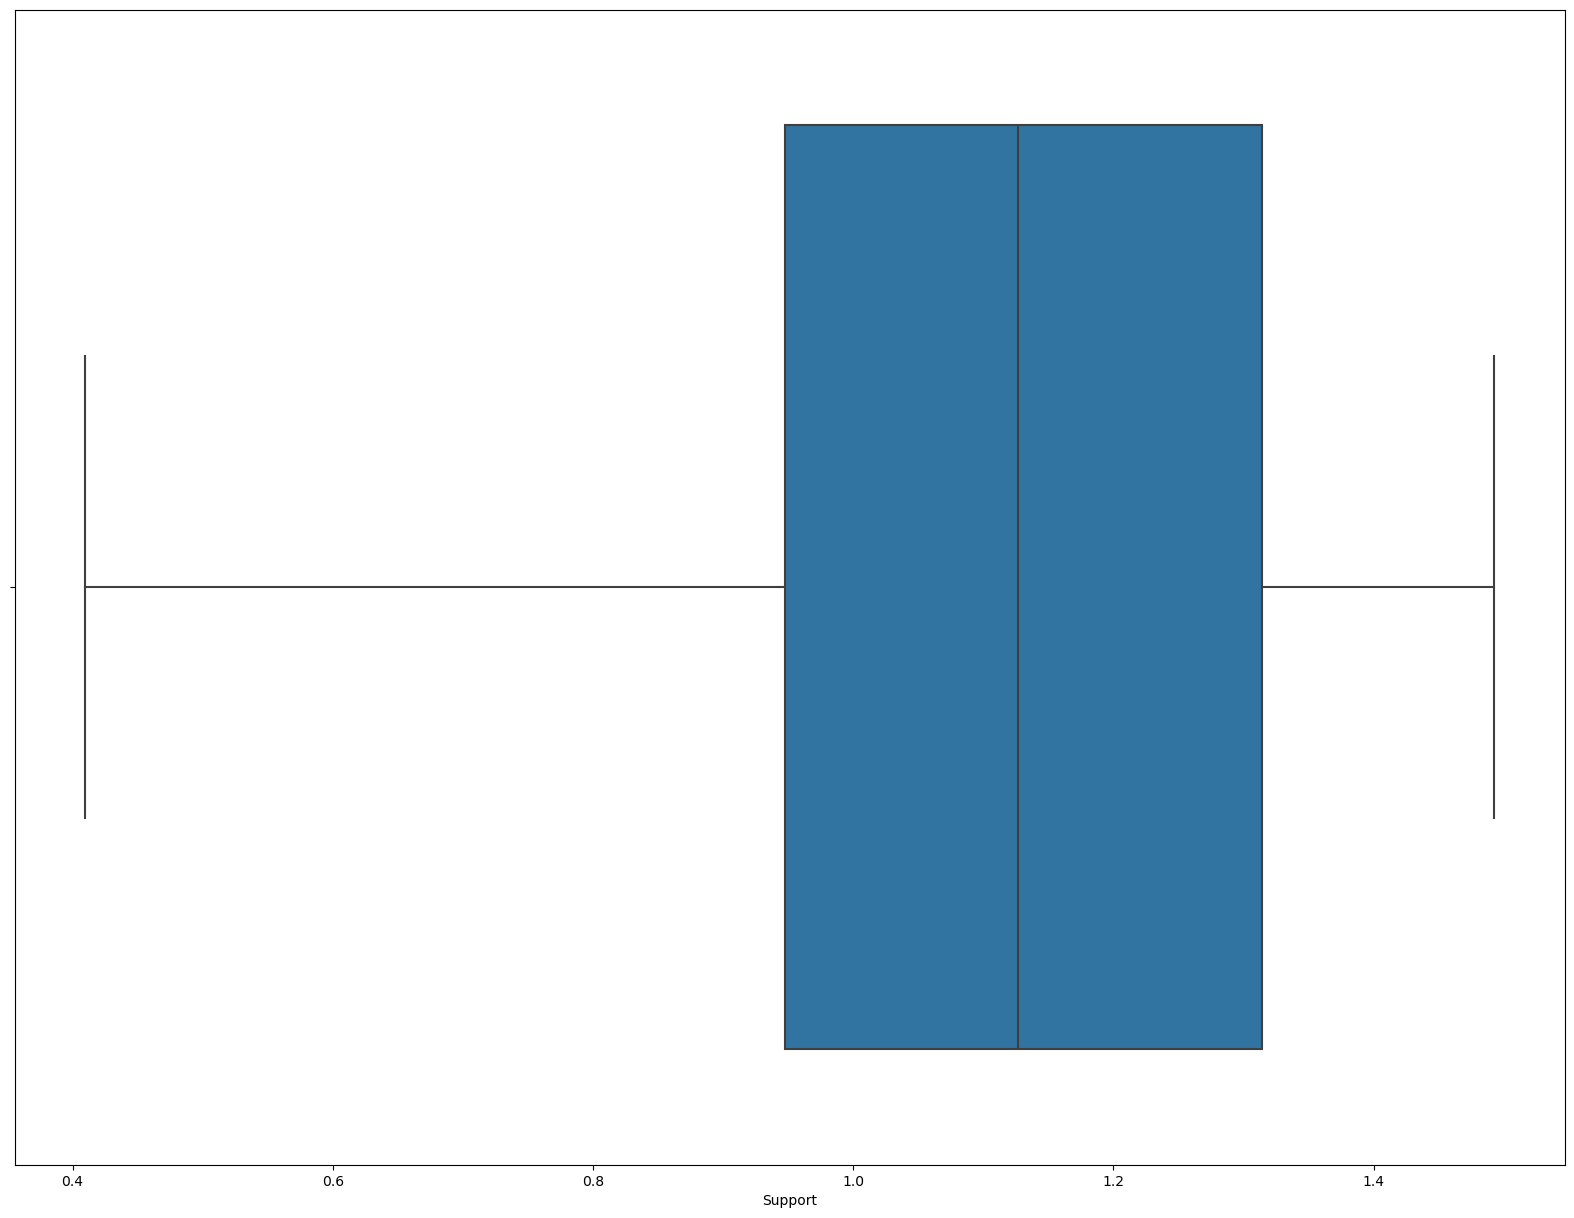

In [306]:
plt.figure(figsize=(20, 15))
sns.boxplot(x=no_outliers['Support'])

In [307]:
F_outlier = box_outliers(avg_df['Freedom'])
print(F_outlier)

Country
Angola    0.027433
Sudan     0.032951
Name: Freedom, dtype: float64


In [308]:
#Remove outliers from Freedom
no_outliers = no_outliers.drop(["Angola", "Sudan"])

<Axes: xlabel='Freedom'>

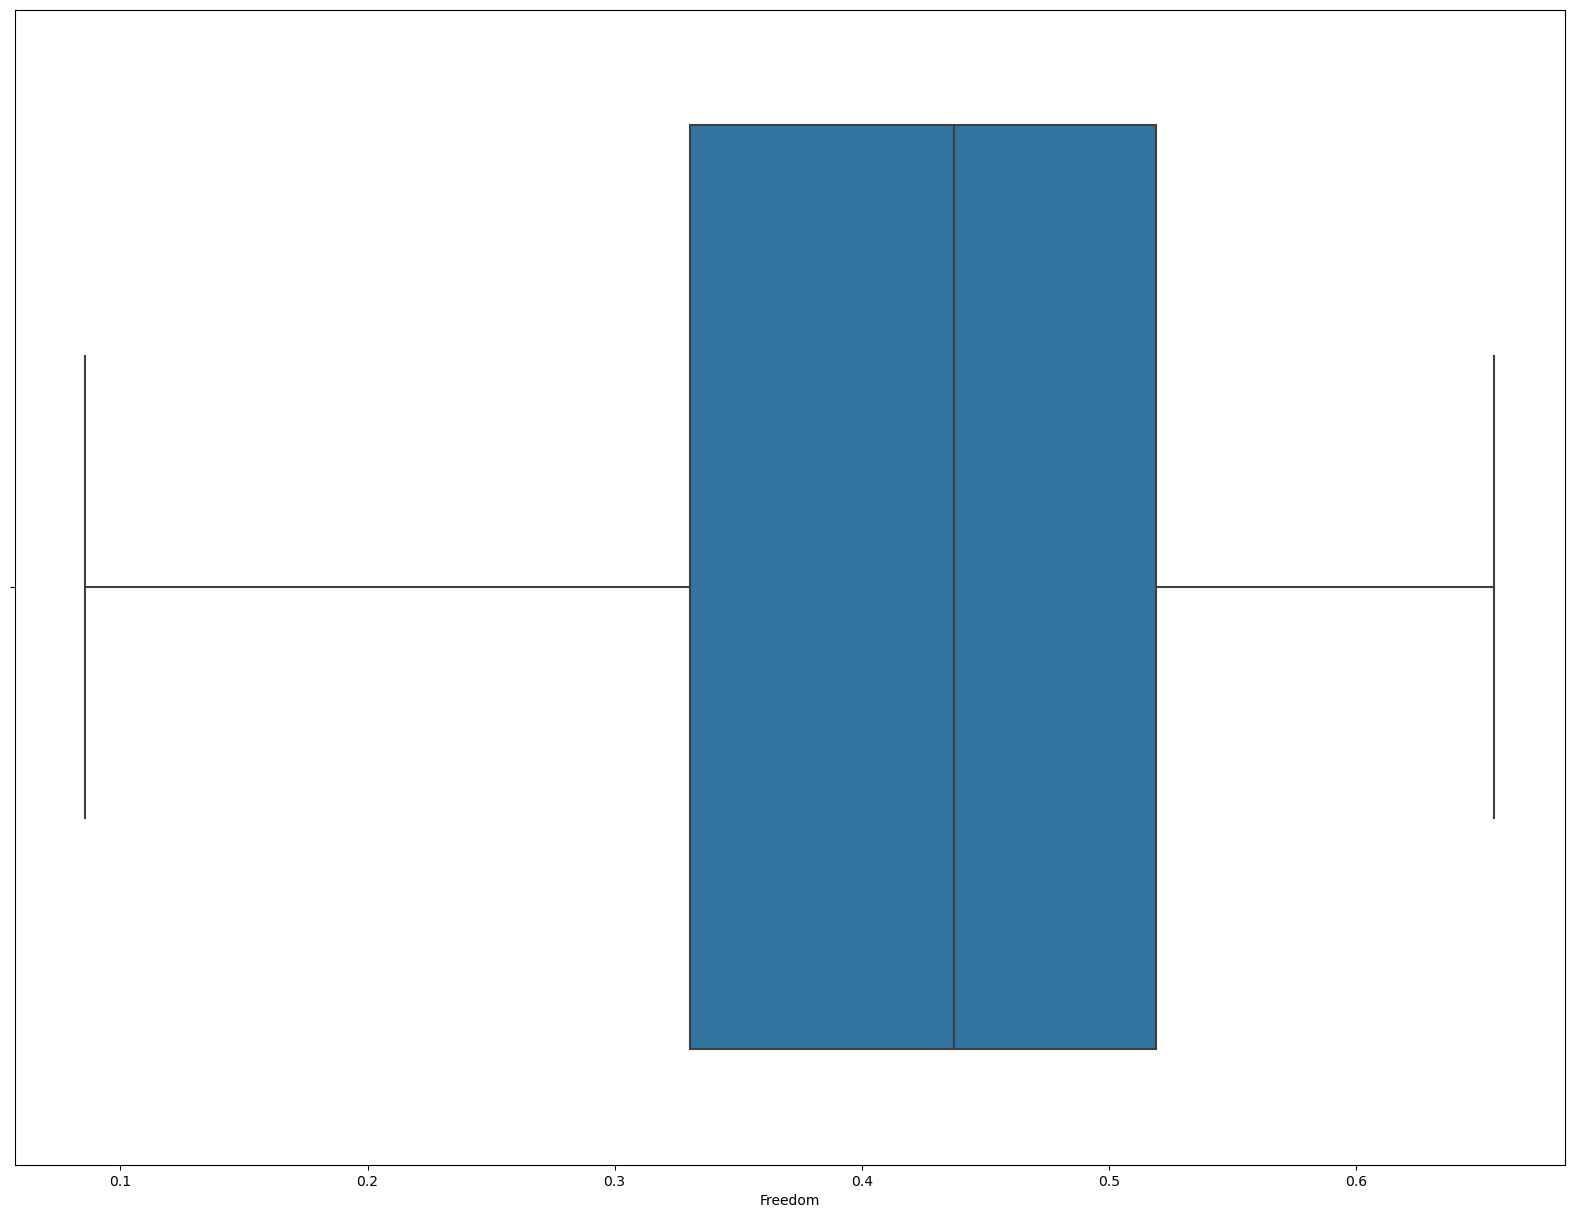

In [309]:
plt.figure(figsize=(20, 15))
sns.boxplot(x=no_outliers['Freedom'])

In [310]:
G_outlier = box_outliers(avg_df['Generosity'])
print(G_outlier)

Country
Indonesia            0.534853
Myanmar              0.723533
Somaliland Region    0.514790
Somaliland region    0.503180
Name: Generosity, dtype: float64


In [311]:
#Remove outliers from Generosity
no_outliers = no_outliers.drop(["Indonesia",  "Myanmar", "Somaliland Region", "Somaliland region"])

<Axes: xlabel='Generosity'>

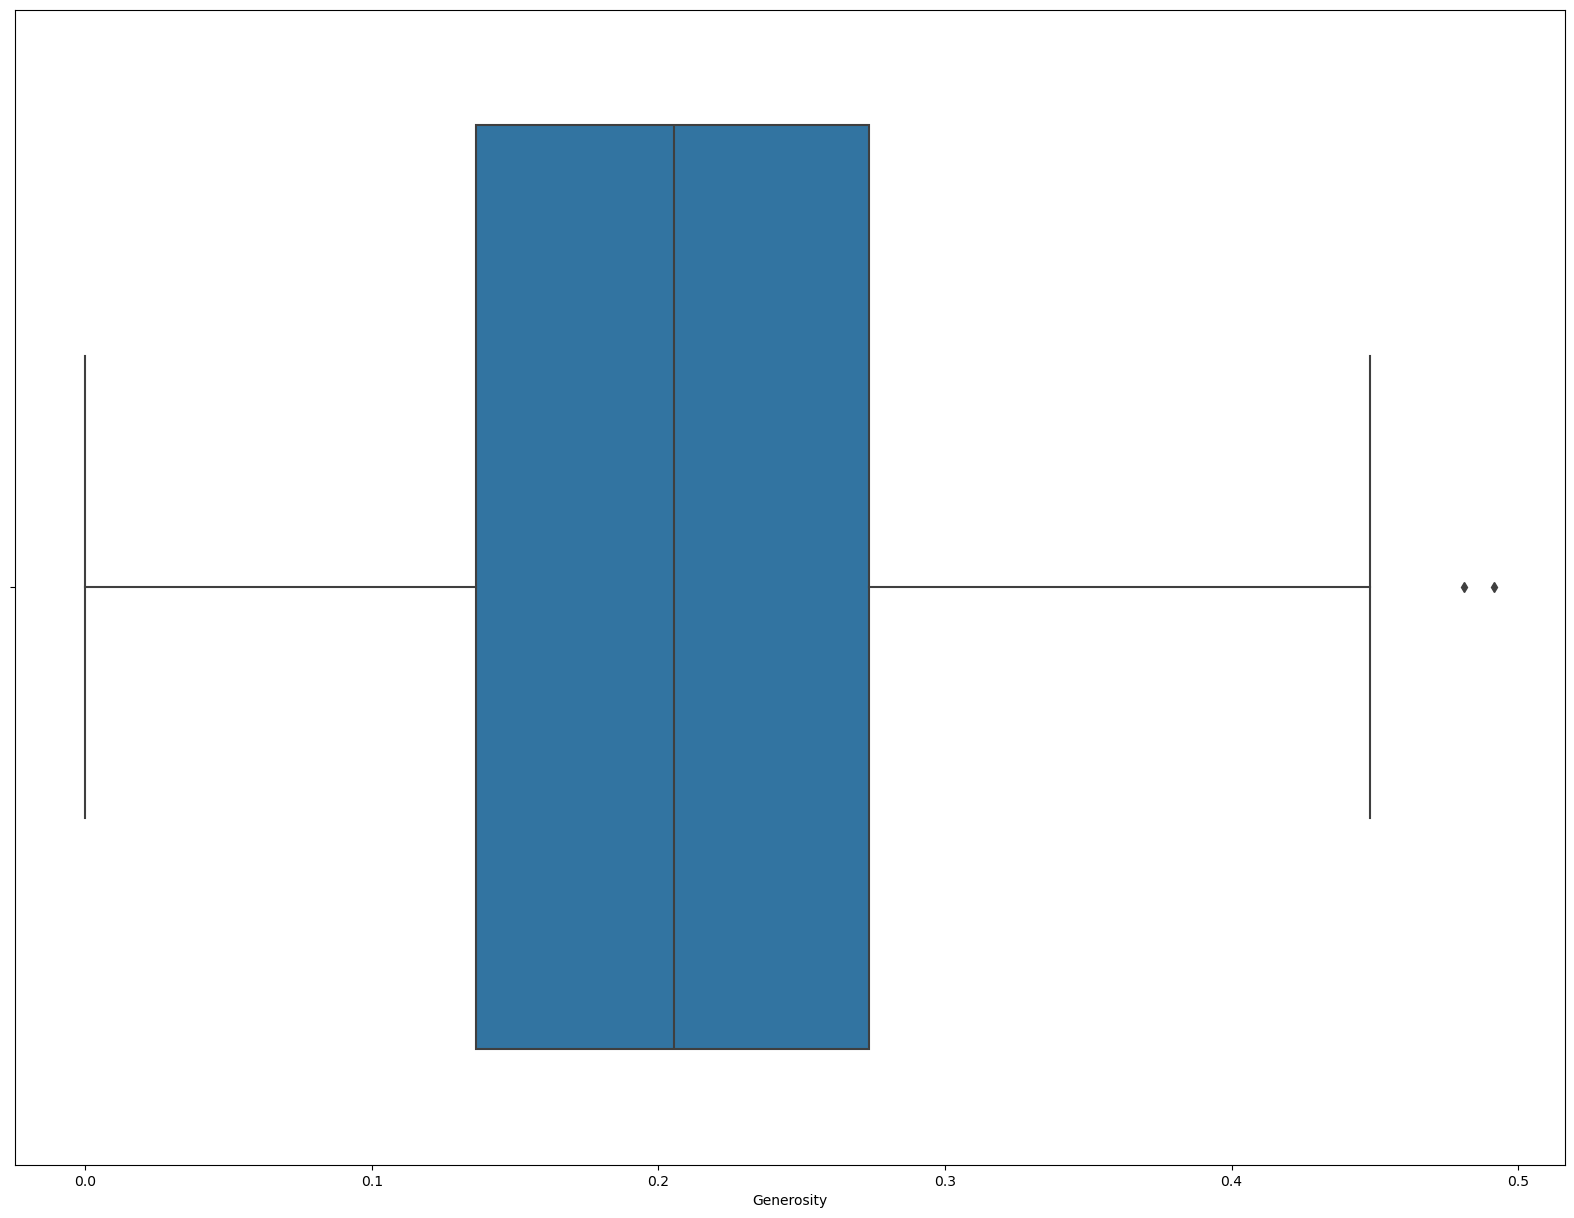

In [312]:
plt.figure(figsize=(20, 15))
sns.boxplot(x=no_outliers['Generosity'])

In [313]:
G2_outlier = box_outliers(no_outliers['Generosity'])
print(G2_outlier)

Country
Malta       0.481124
Thailand    0.491677
Name: Generosity, dtype: float64


In [314]:
#Remove rest of outliers for Generosity
no_outliers = no_outliers.drop(["Malta",  "Thailand"])

<Axes: xlabel='Generosity'>

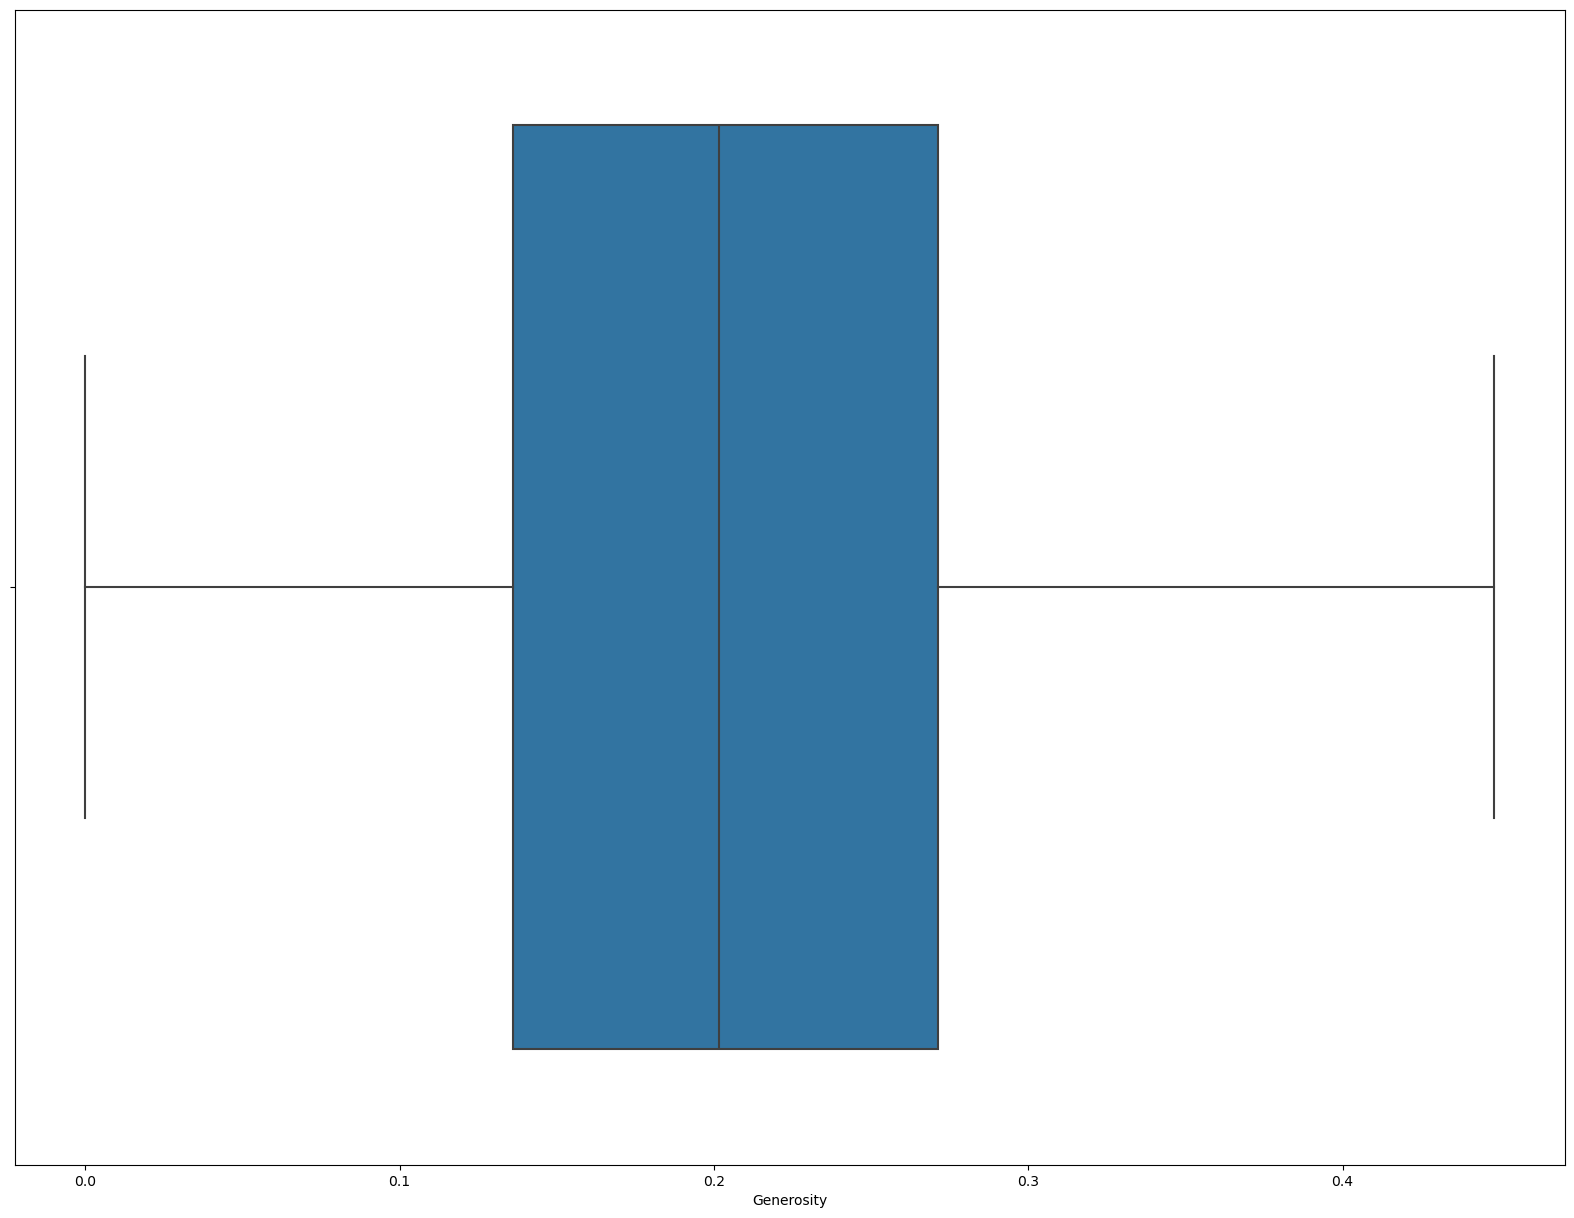

In [315]:
plt.figure(figsize=(20, 15))
sns.boxplot(x=no_outliers['Generosity'])

In [316]:
C_outlier = box_outliers(avg_df['Corruption'])
print(C_outlier)

Country
Australia               0.314573
Denmark                 0.429374
Finland                 0.398474
Hong Kong               0.316427
Luxembourg              0.337421
New Zealand             0.400015
Norway                  0.343951
Oman                    0.325240
Qatar                   0.355974
Rwanda                  0.473468
Singapore               0.467256
Somaliland Region       0.367940
Somaliland region       0.399280
Sweden                  0.397502
Switzerland             0.379763
United Arab Emirates    0.311982
Name: Corruption, dtype: float64


In [317]:
#Remove outliers from Corruption
no_outliers = no_outliers.drop(["Australia", "Denmark", "Finland", "Hong Kong", "Luxembourg", "New Zealand", "Norway", "Oman", "Qatar", "Rwanda", "Singapore", "Sweden", "Switzerland", "United Arab Emirates" ])

<Axes: xlabel='Corruption'>

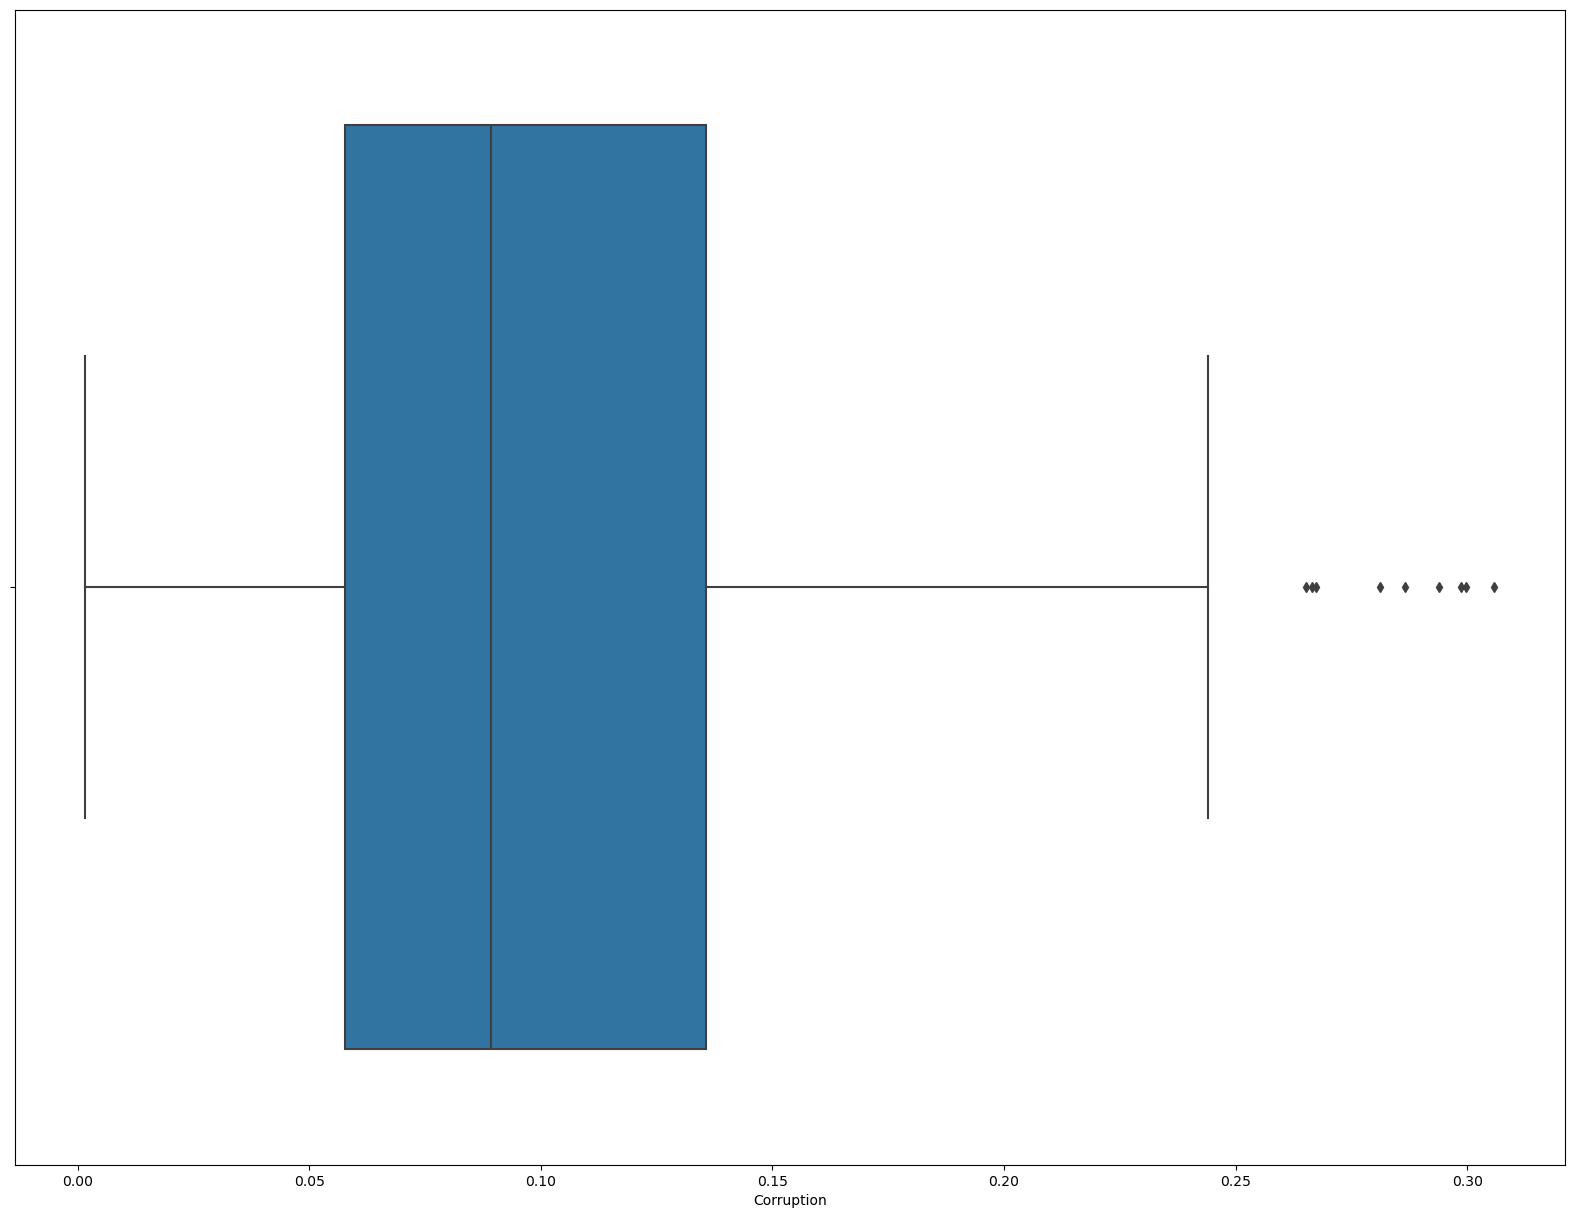

In [318]:
plt.figure(figsize=(20, 15))
sns.boxplot(x=no_outliers['Corruption'])

In [300]:
C2_outlier = box_outliers(no_outliers['Corruption'])
print(C2_outlier)

Country
Belgium           0.237845
Saudi Arabia      0.231550
United Kingdom    0.244018
Name: Corruption, dtype: float64


In [319]:
#Remove more outliers from Corruption
no_outliers = no_outliers.drop(["Belgium", "Saudi Arabia", "United Kingdom"])

<Axes: xlabel='Corruption'>

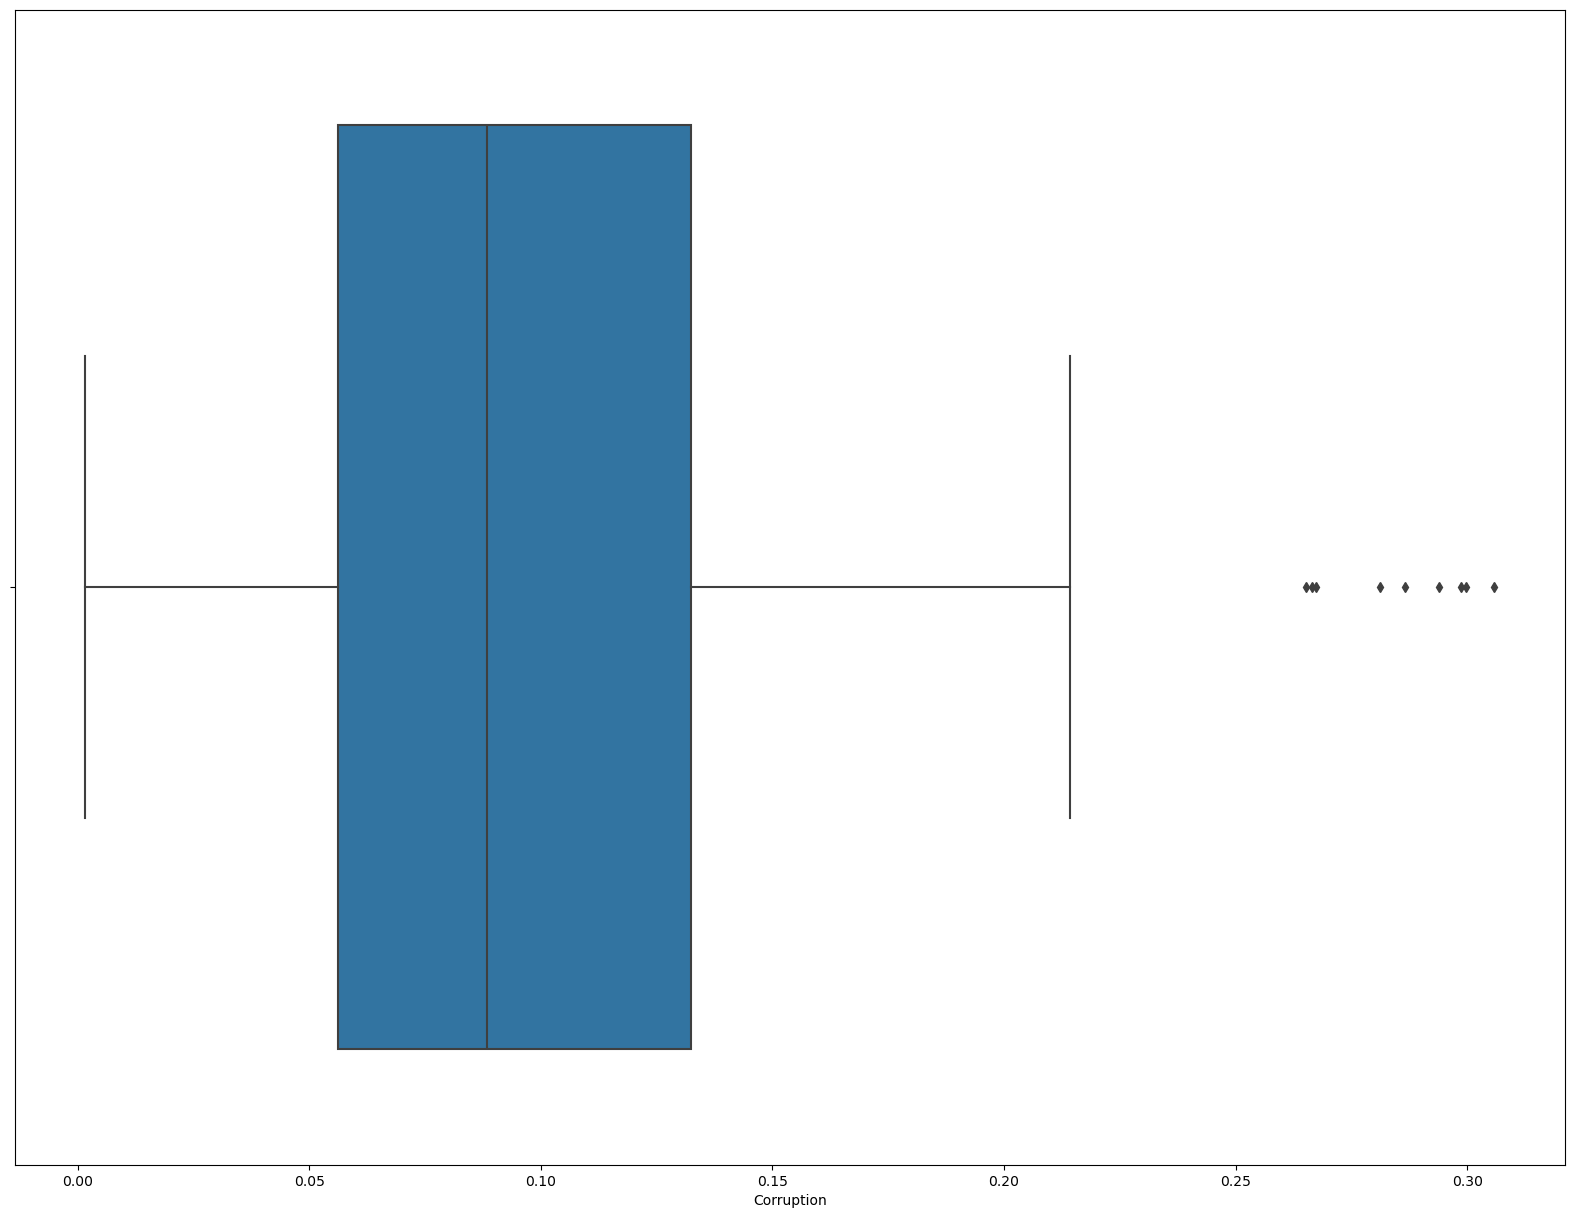

In [320]:
plt.figure(figsize=(20, 15))
sns.boxplot(x=no_outliers['Corruption'])

In [321]:
C3_outlier = box_outliers(no_outliers['Corruption'])
print(C3_outlier)

Country
Canada                     0.305846
Djibouti                   0.281050
Georgia                    0.266555
Germany                    0.265134
Hong Kong S.A.R., China    0.293934
Ireland                    0.299792
Netherlands                0.298614
Somalia                    0.286553
Uzbekistan                 0.267424
Name: Corruption, dtype: float64


In [322]:
#Remove more outliers from Corruption
no_outliers = no_outliers.drop(["Canada", "Djibouti","Georgia", "Germany", "Hong Kong S.A.R., China", "Ireland", "Netherlands", "Somalia", "Uzbekistan"])

<Axes: xlabel='Corruption'>

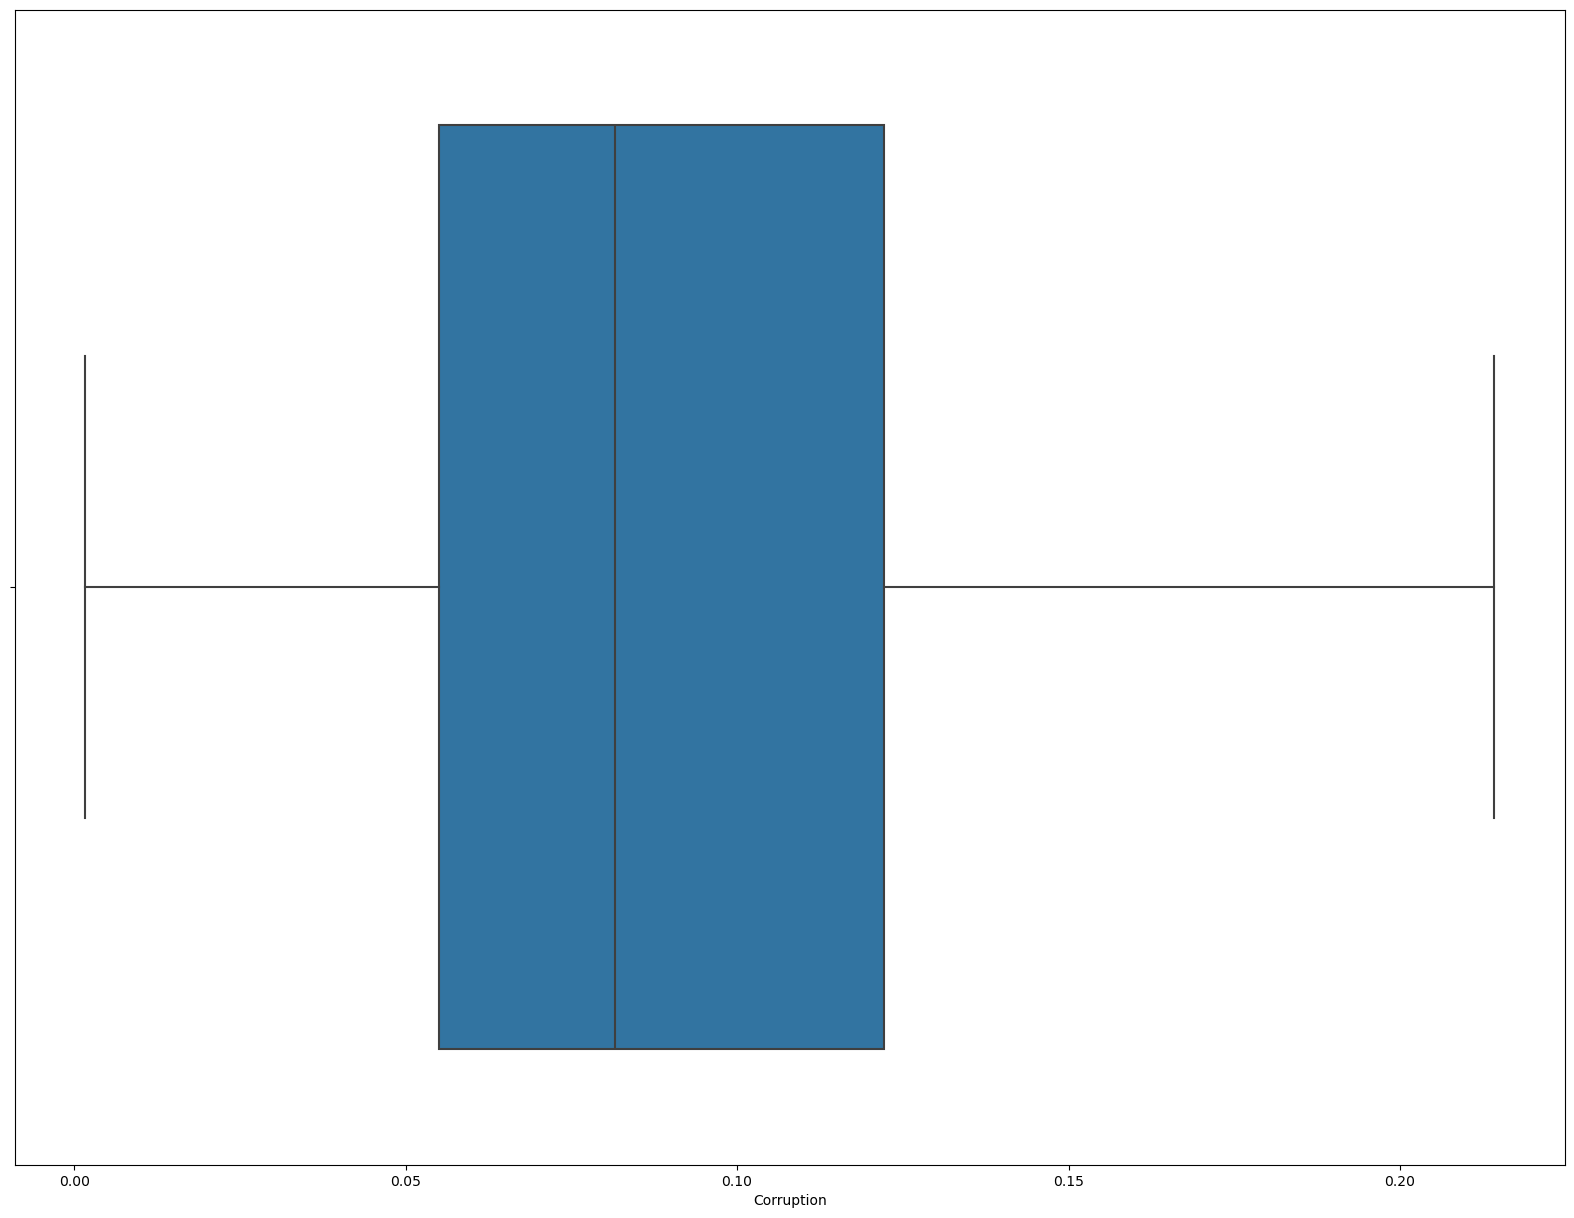

In [323]:
plt.figure(figsize=(20, 15))
sns.boxplot(x=no_outliers['Corruption'])

<Axes: >

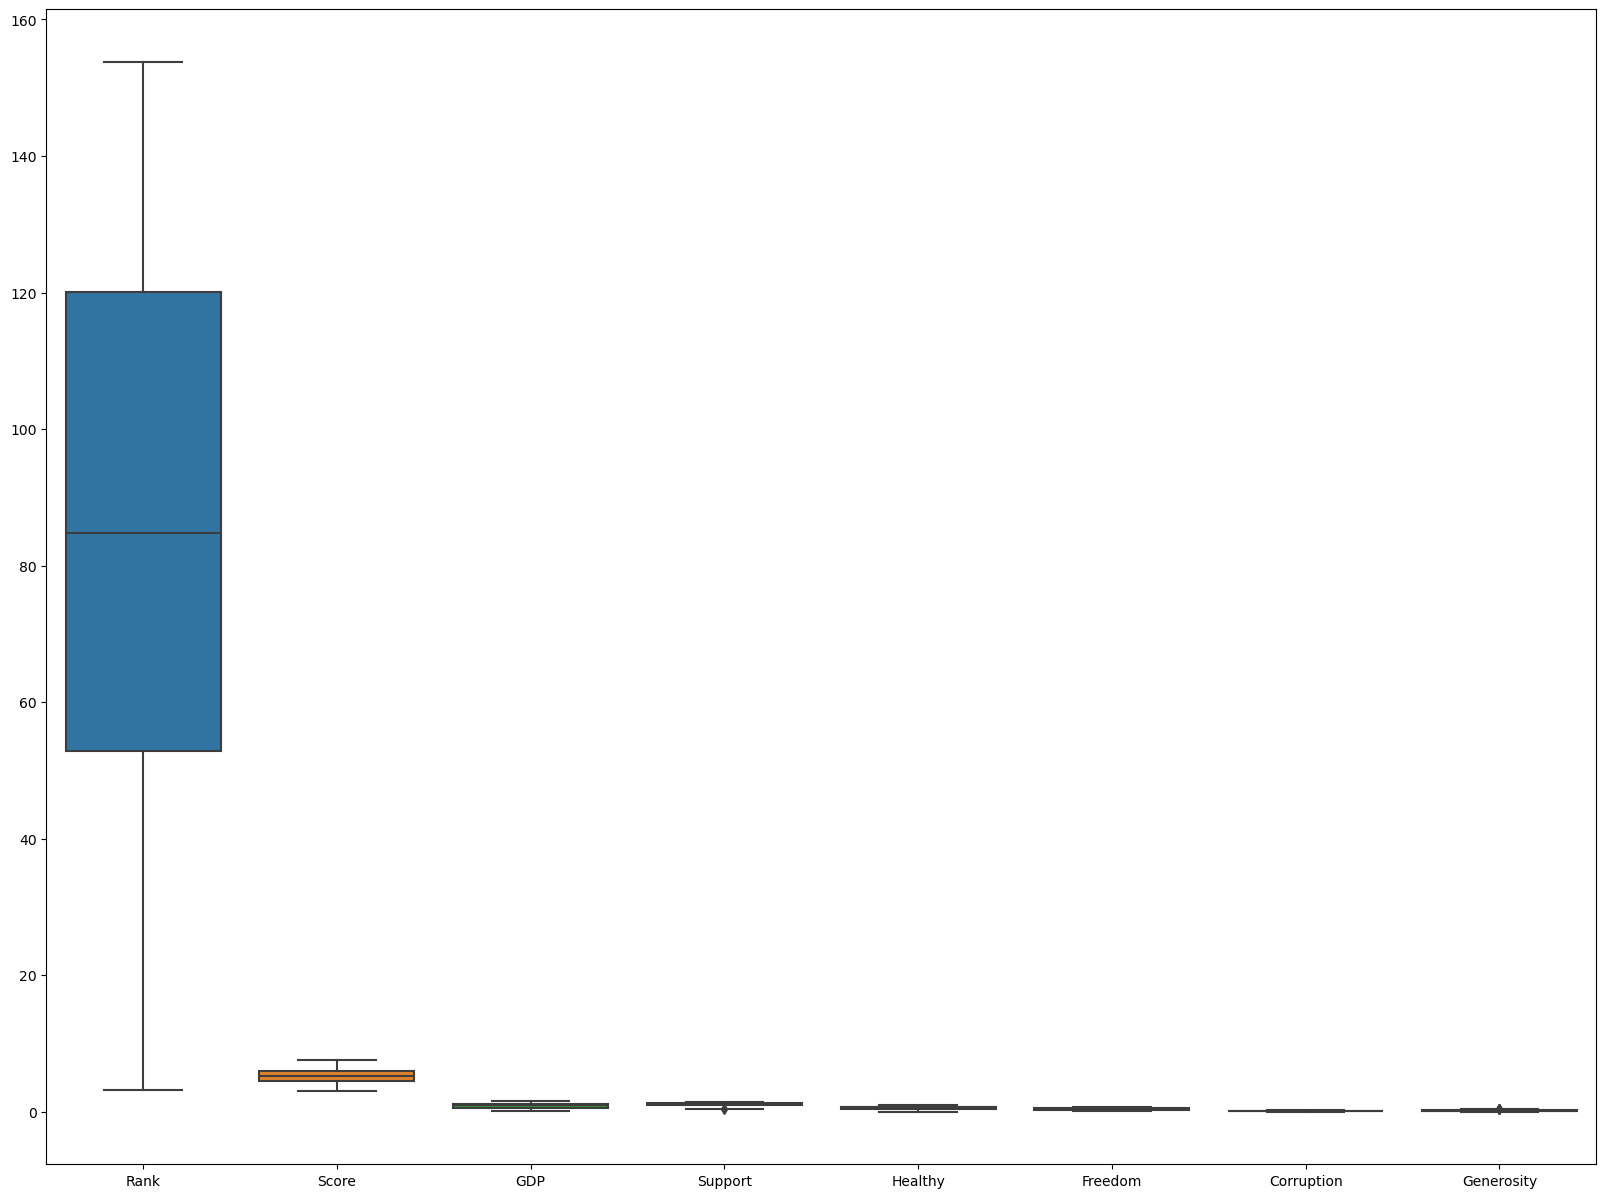

In [324]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=no_outliers)

In [325]:
S2_outlier = box_outliers(no_outliers['Support'])
print(S2_outlier)

Country
Afghanistan    0.409753
Name: Support, dtype: float64


In [326]:
#Remove rest of outliers for Support
no_outliers = no_outliers.drop(["Afghanistan"])

<Axes: xlabel='Support'>

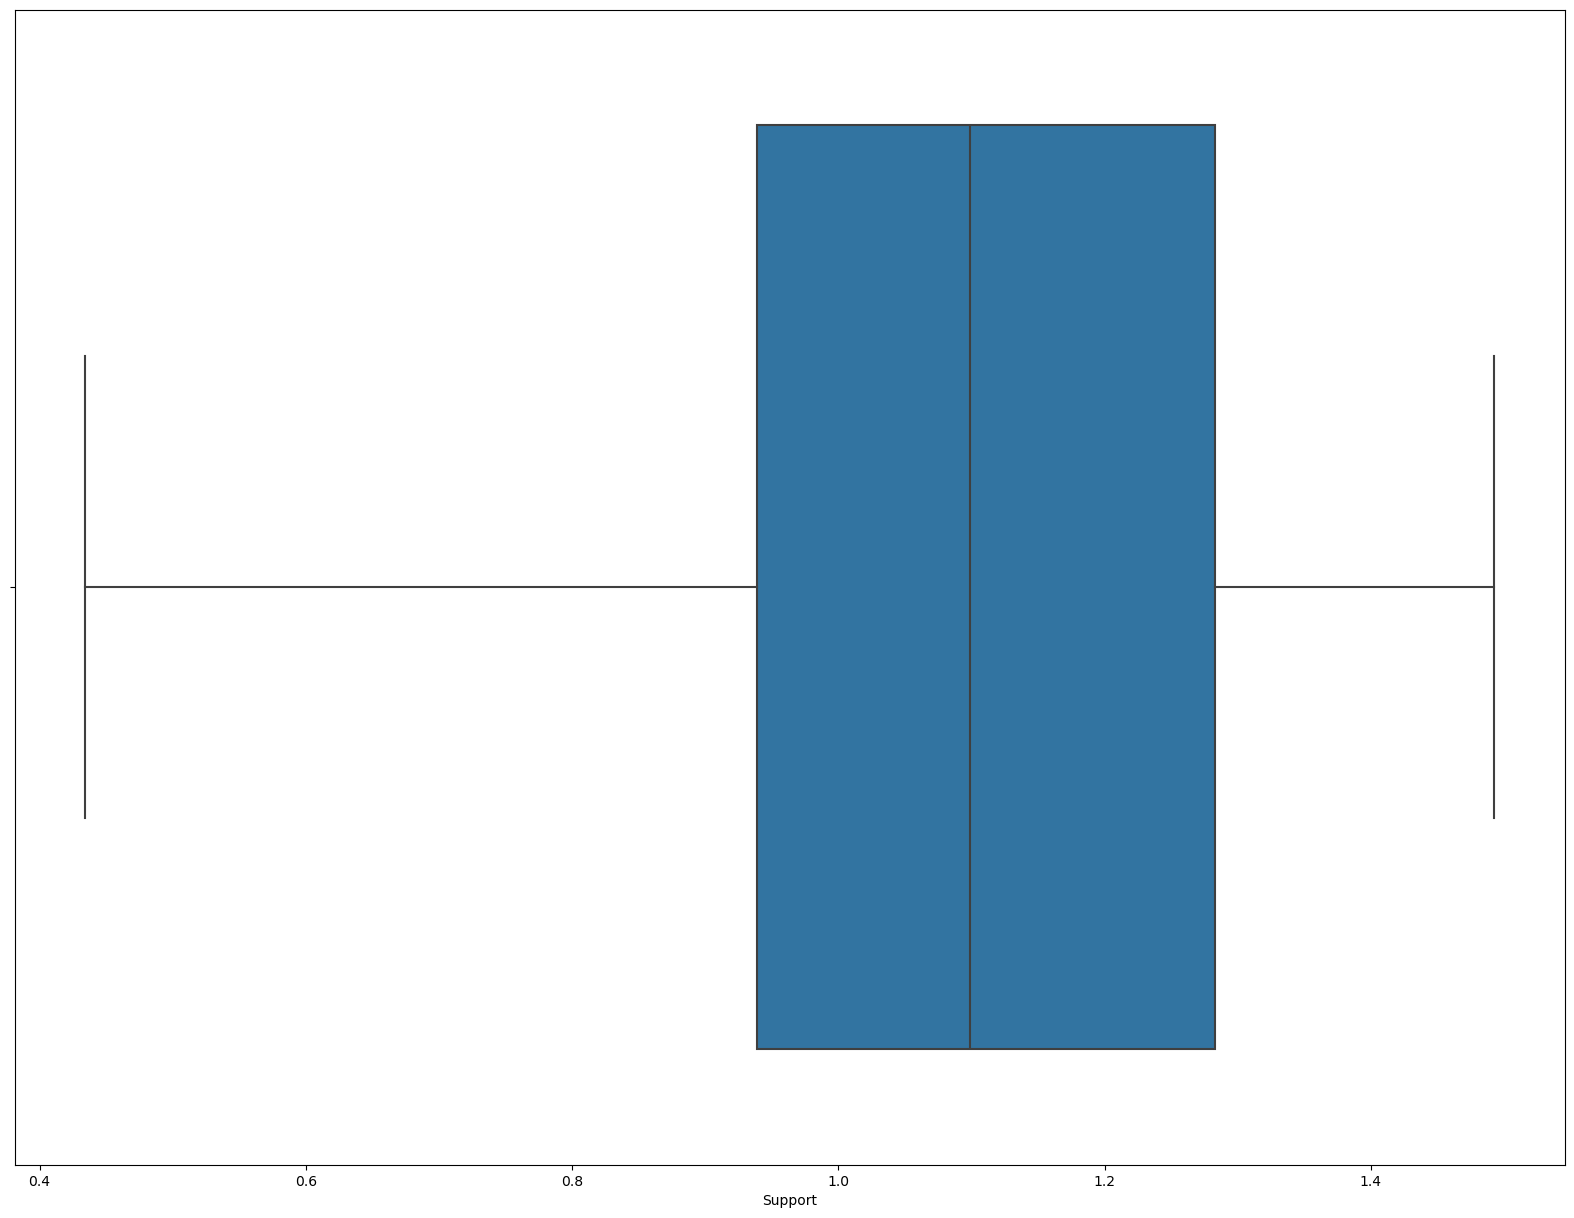

In [327]:
plt.figure(figsize=(20, 15))
sns.boxplot(x=no_outliers['Support'])

In [328]:
G3_outlier = box_outliers(no_outliers['Generosity'])
print(G3_outlier)

Country
Bhutan     0.434699
Haiti      0.448331
Iceland    0.419124
Name: Generosity, dtype: float64


In [329]:
#Remove more outliers from Corruption
no_outliers = no_outliers.drop(["Bhutan", "Haiti","Iceland"])

<Axes: xlabel='Generosity'>

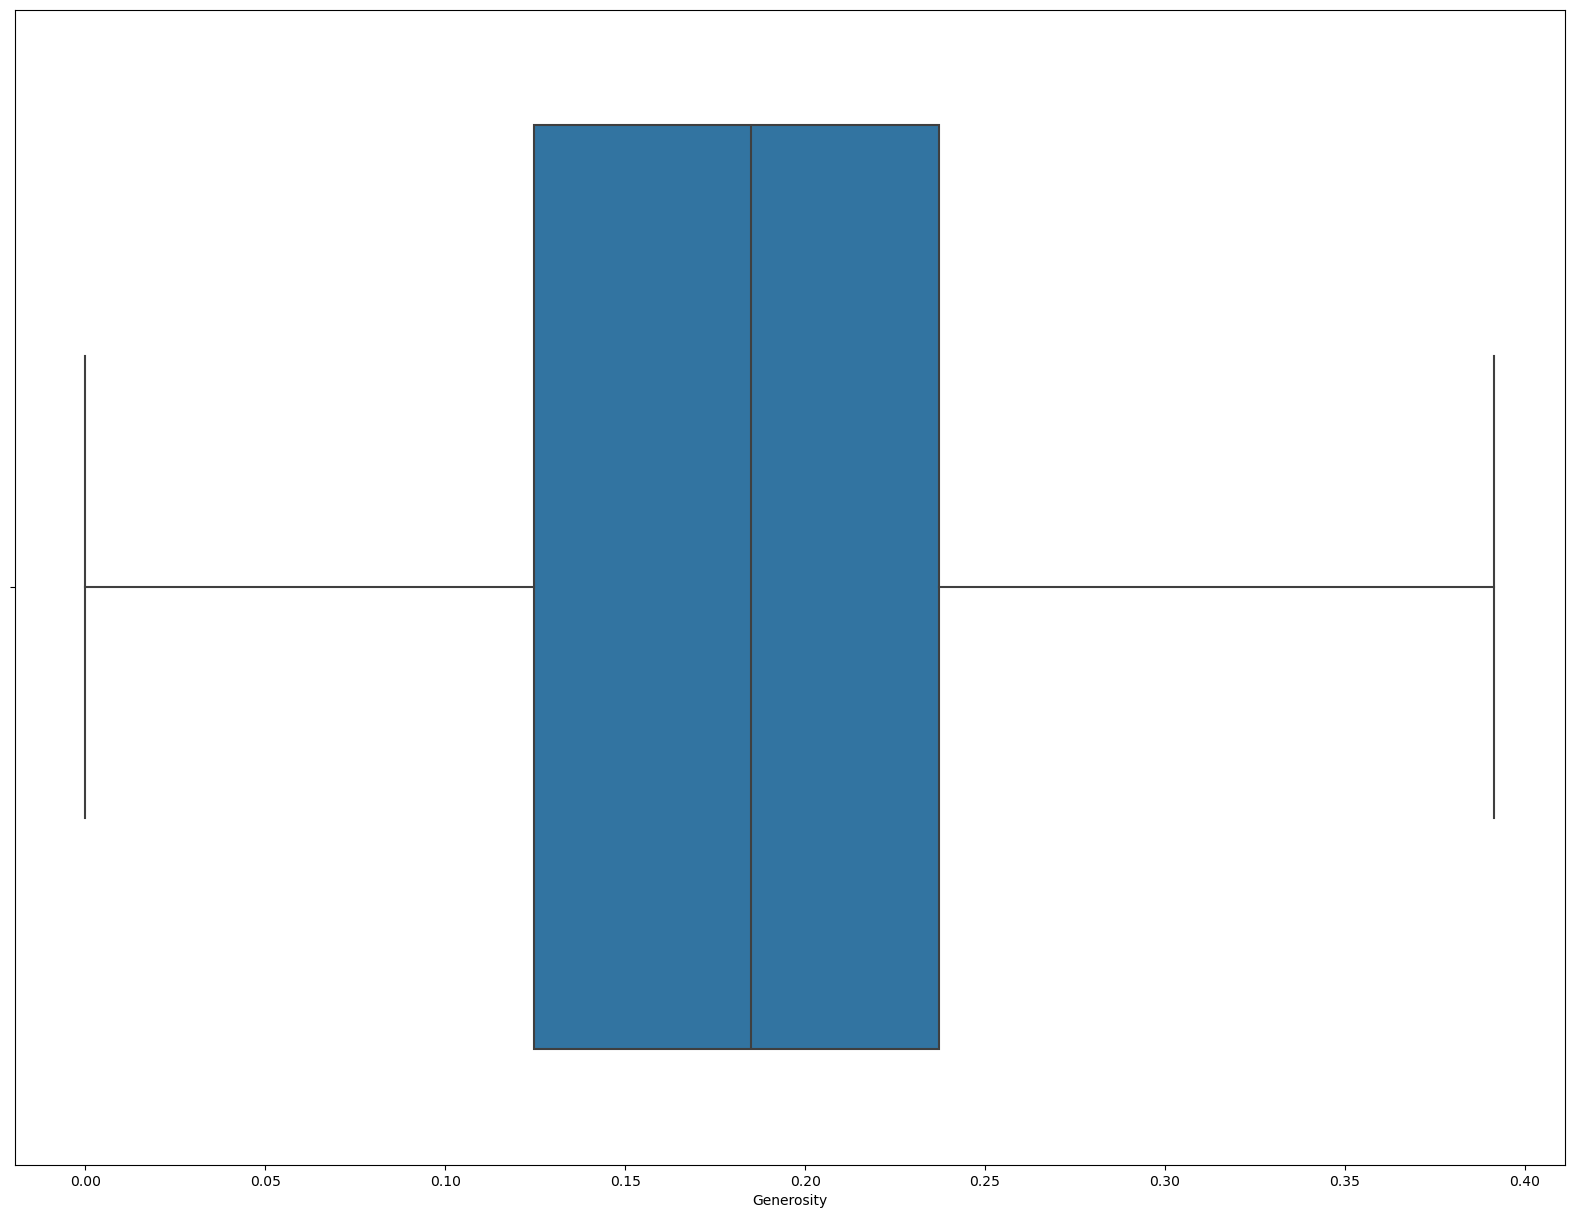

In [330]:
plt.figure(figsize=(20, 15))
sns.boxplot(x=no_outliers['Generosity'])

<Axes: >

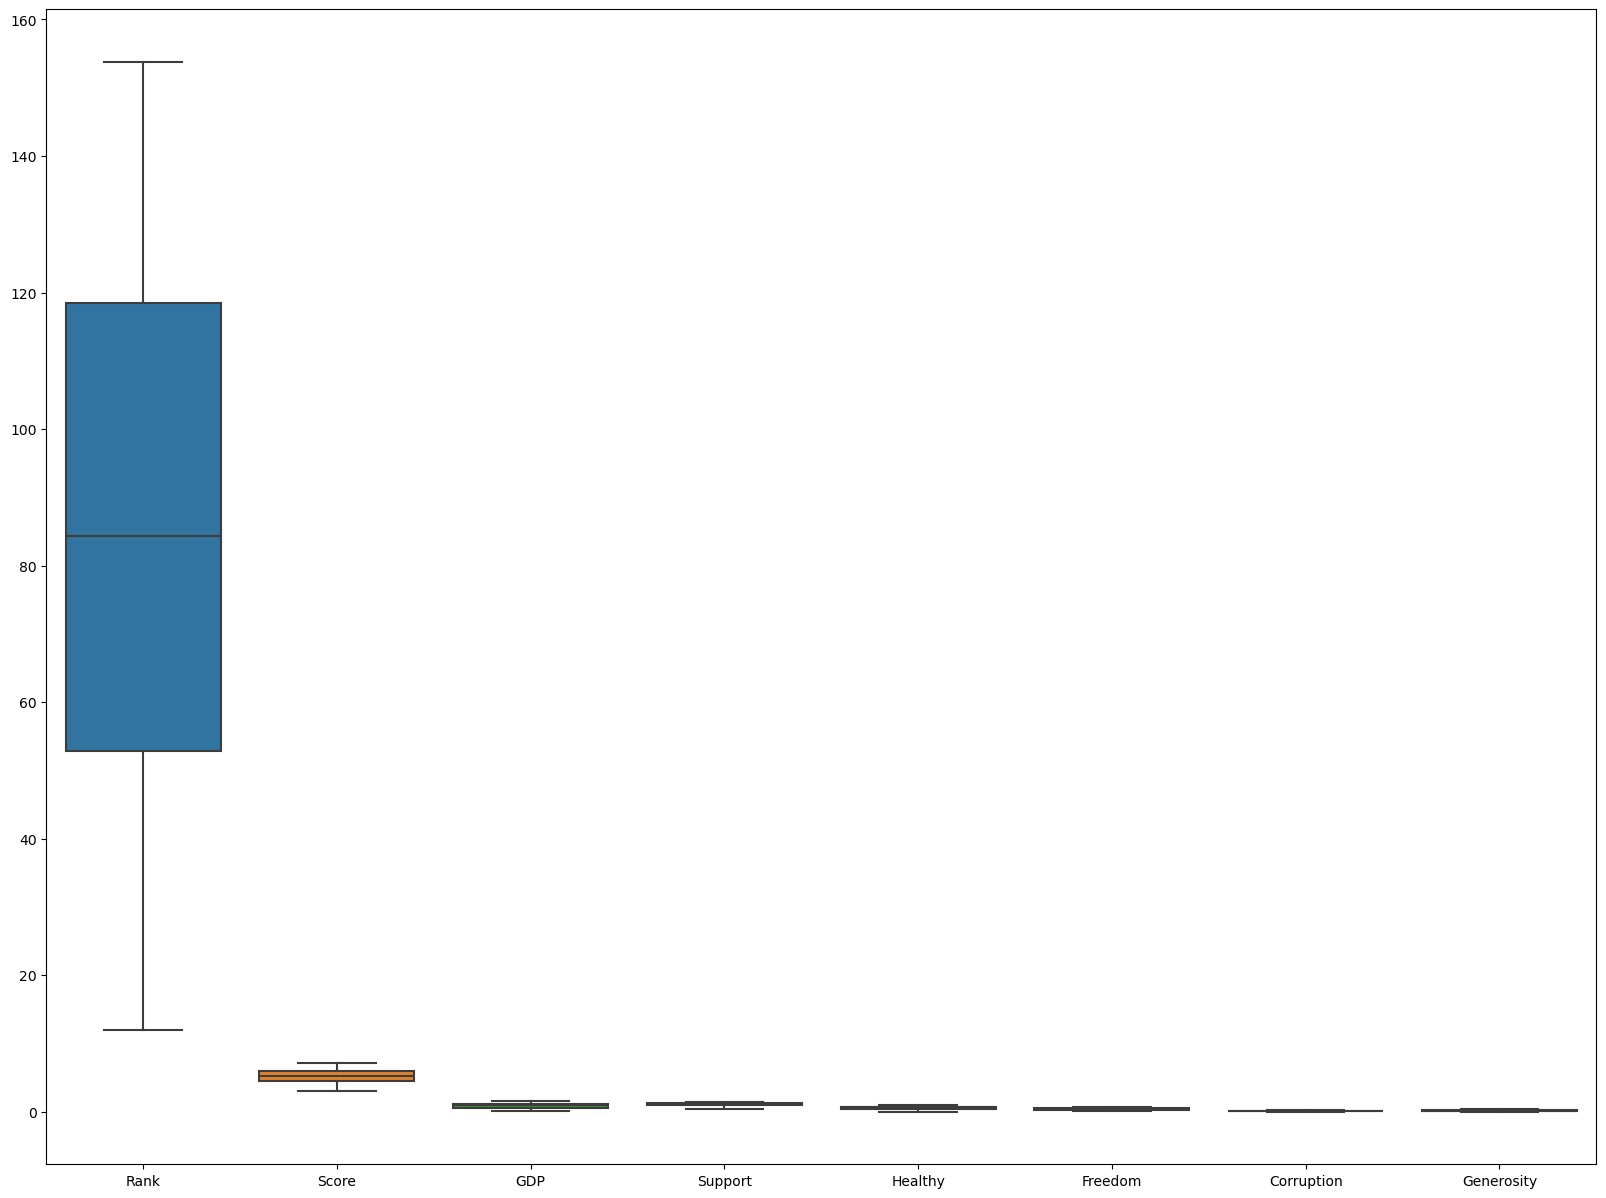

In [331]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=no_outliers)

In [332]:
#Correlation Matrix with No Outliers
corr_values = no_outliers.corr()
corr_values

,Rank,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
Rank,1.000000,-0.995336,-0.774344,-0.674274,-0.731372,-0.416389,-0.087120,0.074966
Score,-0.995336,1.000000,0.772792,0.678293,0.732240,0.425444,0.092612,-0.060331
GDP,-0.774344,0.772792,1.000000,0.651242,0.794622,0.226206,-0.014107,-0.252488
Support,-0.674274,0.678293,0.651242,1.000000,0.547418,0.297808,-0.065339,-0.169802
Healthy,-0.731372,0.732240,0.794622,0.547418,1.000000,0.188334,-0.040479,-0.138674
Freedom,-0.416389,0.425444,0.226206,0.297808,0.188334,1.000000,0.237202,0.240808
Corruption,-0.087120,0.092612,-0.014107,-0.065339,-0.040479,0.237202,1.000000,0.050724
Generosity,0.074966,-0.060331,-0.252488,-0.169802,-0.138674,0.240808,0.050724,1.000000


<Axes: >

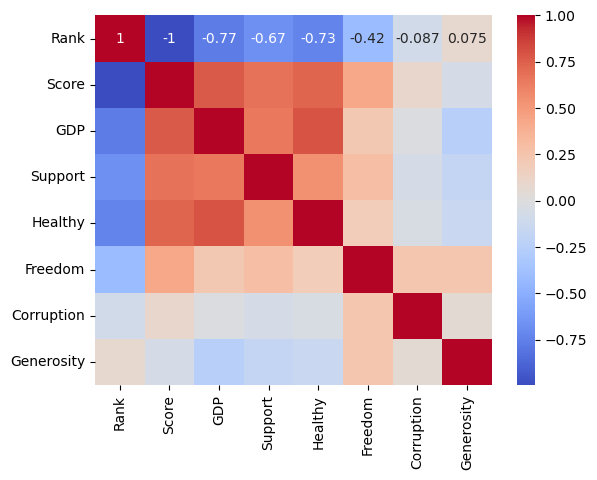

In [333]:
#Heatmap with no outliers
sns.heatmap(corr_values, annot=True, cmap='coolwarm')

In [337]:
PCA_data2 = preprocessing.scale(no_outliers)
pca2 = PCA()
pca2.fit(PCA_data2)

print(PCA_data2)

[[ 0.59384413 -0.58649894  0.16849647 ... -0.14490618 -0.92339735
  -0.22763724]
 [-0.45298162  0.46299796  0.37473725 ... -1.71889806  1.1848635
  -1.41592139]
 [-1.36439707  1.3331462   0.6468534  ...  0.74779108 -0.4909382
  -1.1370928 ]
 ...
 [ 1.6354618  -1.78083739 -1.07820944 ... -1.1840582  -0.43485006
  -1.08220368]
 [ 0.79175149 -0.72738431 -0.84944315 ...  0.5889674   0.18577978
   0.381075  ]
 [ 1.33339267 -1.36235737 -1.48125912 ... -0.5406476   0.03539974
  -0.20930594]]


In [338]:
print("Variance of each principal component:")
print(pca2.explained_variance_)

print("The Variance ratios of each prinicipal component:")
per_var2 = np.round(pca2.explained_variance_ratio_ * 100, decimals =1)
print(per_var2)

Variance of each principal component:
[4.16933523 1.41090107 0.9509673  0.61613969 0.42022329 0.30876921
 0.18213362 0.00452272]
The Variance ratios of each prinicipal component:
[51.7 17.5 11.8  7.6  5.2  3.8  2.3  0.1]


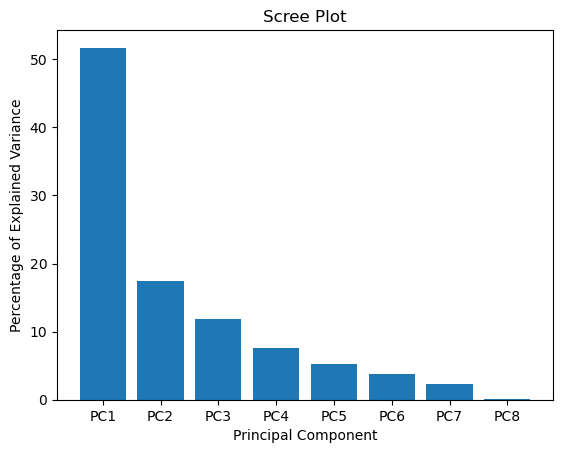

In [339]:
# Plot the variance ratios as a bar graph
labels = ['PC' + str(x) for x in range(1, len(per_var2)+1)]

plt.bar(x=range(1, len(per_var2) + 1), height=per_var2, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [340]:
#show the column which has the highest effect on the variance
loadings = pd.DataFrame(pca.components_.T, columns=['PC'+str(i) for i in range(1, len(no_outliers.columns)+1)], index=no_outliers.columns)
loadings['PC1'].abs().sort_values(ascending=False)

Score         0.467176
Rank          0.466646
GDP           0.436860
Healthy       0.412204
Support       0.387979
Freedom       0.214429
Generosity    0.077640
Corruption    0.026348
Name: PC1, dtype: float64

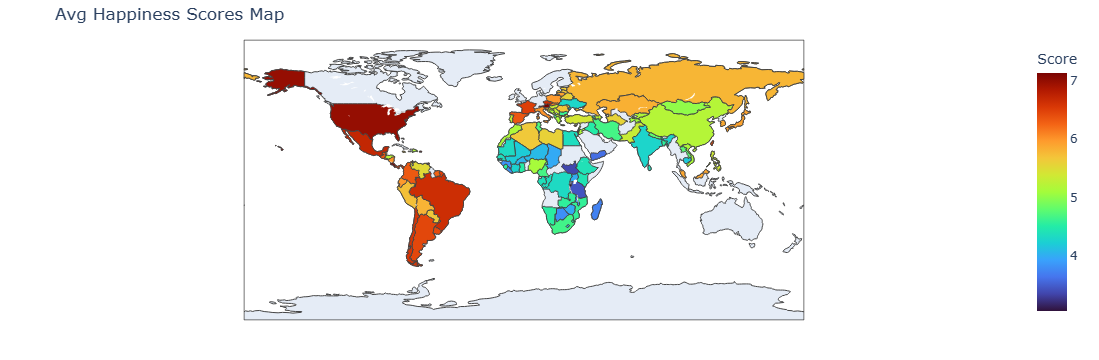

In [342]:
df_country = no_outliers.groupby('Country')['Score'].mean().reset_index()

Country_Happiness = px.choropleth(df_country, locations='Country', locationmode='country names', 
                                  color='Score', color_continuous_scale='Turbo', title = 'Avg Happiness Scores Map')
Country_Happiness.update_layout(margin=dict(l=40, r=40, t=40, b=40))
Country_Happiness.show()